In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import GridSearchCV

In [2]:
#Rutas
path = 'Data/'

In [3]:
european_football = pd.read_csv(path+'european_football.csv', delimiter=';', 
                                decimal=',')

In [4]:
european_football.head(5)

,Div,Mes,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito
0,P1,1,1.099989,1,1,0,1
1,P1,5,1.099989,1,1,0,1
2,P1,8,1.149954,1,1,0,1
3,P1,9,1.149954,1,1,0,1
4,P1,10,1.149954,1,1,0,1


In [5]:
european_football.dtypes

Div                  object
Mes                   int64
Probabilidad        float64
LocalVisitante        int64
JuegaEuropa           int64
MundialOEurocopa      int64
GanaFavorito          int64
dtype: object

In [6]:
dummies = pd.get_dummies(european_football, columns=['Div', 'Mes'])

In [7]:
dummies.head()

,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito,Div_D1,Div_E0,Div_F1,Div_I1,Div_P1,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,1.099989,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.099989,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.149954,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.149954,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1.149954,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
columns = list(dummies.columns)

In [9]:
columns.remove('GanaFavorito')

In [10]:
columns

['Probabilidad',
 'LocalVisitante',
 'JuegaEuropa',
 'MundialOEurocopa',
 'Div_D1',
 'Div_E0',
 'Div_F1',
 'Div_I1',
 'Div_P1',
 'Div_SP1',
 'Mes_1',
 'Mes_2',
 'Mes_3',
 'Mes_4',
 'Mes_5',
 'Mes_6',
 'Mes_7',
 'Mes_8',
 'Mes_9',
 'Mes_10',
 'Mes_11',
 'Mes_12']

### K NEAREST NEIGHBORS

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
X = dummies[columns].values

In [12]:
y = dummies["GanaFavorito"] #Hace 0 y 1

In [13]:
clf = KNeighborsClassifier(n_neighbors=150)

In [14]:
clf.fit(X, y) #entrenamos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [15]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, clf.predict(X_test))

0.57943696450428395

In [23]:
clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Vamos a ver en un gráfico, 

Average precision-recall score: 0.64


Text(0.5,1,'2-class Precision-Recall curve: AP=0.64')

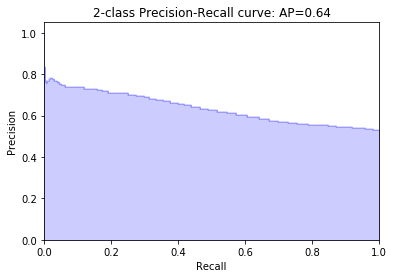

In [21]:
from sklearn.metrics import precision_recall_curve

y_score = clf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [ ]:
#Curve ROC

In [30]:
from sklearn.metrics import roc_curve, auc

In [24]:
actual = y_test
predictions = clf.predict(X_test)

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

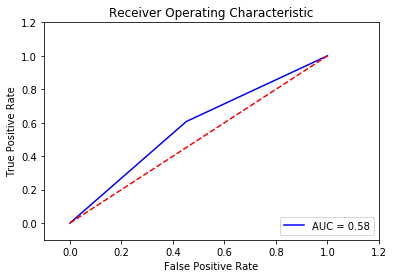

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#Crossval score: para reorganizar y hacer el accuracy varias veces, así será más acertado el accuracy

In [22]:
from sklearn.model_selection import cross_val_score

In [51]:
mean_accuracy = cross_val_score(clf,X,y, cv=10, scoring='accuracy')

In [94]:
mean_accuracy.mean()

NameError: name 'mean_accuracy' is not defined

(array([ 1.,  1.,  0.,  1.,  1.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0.53419494,  0.5425853 ,  0.55097566,  0.55936603,  0.56775639,
         0.57614676,  0.58453712,  0.59292748,  0.60131785,  0.60970821,
         0.61809857]),
 <a list of 10 Patch objects>)

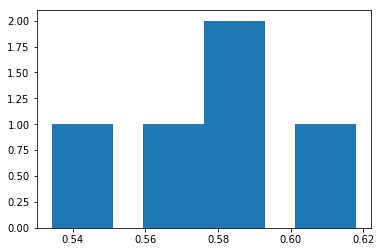

In [53]:
plt.hist(mean_accuracy) #Para ver los distintos accuracies que tiene el modelo

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Create the estimator and train it
clfdt = DecisionTreeClassifier(max_depth=10)

In [25]:
clfdt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
accuracy_score(y_test, clfdt.predict(X_test))

0.62072623419012651

Average precision-recall score: 0.71


Text(0.5,1,'2-class Precision-Recall curve: AP=0.71')

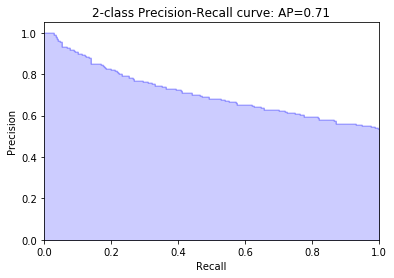

In [27]:
from sklearn.metrics import precision_recall_curve

y_score = clfdt.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [28]:
actual = y_test
predictions = clfdt.predict(X_test)

In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

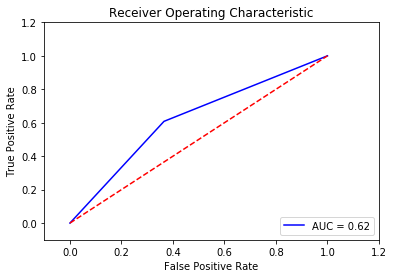

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

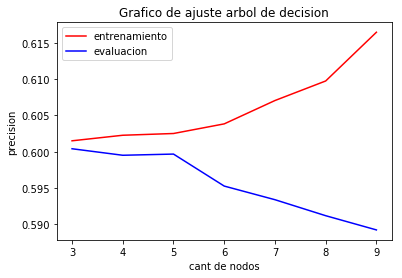

In [35]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 10))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [63]:
clfdt1 =GridSearchCV(estimator=DecisionTreeClassifier(max_depth = 50, min_samples_leaf = 50),
                     param_grid={'max_depth': np.arange(1,51), 'min_samples_lead': np. arange(1,51)} ,
                     scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
clfdt1.fit(X,y)

In [57]:
clfdt1.best_params_

{'max_depth': 3}

In [60]:
clfdt1.best_score_

0.60046854803963812

In [58]:
clfdt1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
mejor_modelo = clfdt1.best_estimator_
mejor_modelo.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo.score(X_test, y_test)))

Precisión: 0.600


## Support Vector Machines

In [31]:
from sklearn.svm import SVC

In [103]:
clfSVM = SVC(kernel ='linear', degree=5)

In [104]:
clfSVM.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
accuracy_score(y_test, clfSVM.predict(X_test))

0.59983680130558958

In [32]:
clf = SVC(kernel='linear', C=0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
a = cross_val_score(clf,X,y, cv=10, scoring='accuracy')
a.mean()

### OTROS

In [15]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

In [19]:
# evaluate each model in turn
results = []
names = []
seed = 0.42
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.600337 (0.015195)


/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are colli

LDA: 0.600177 (0.014682)
NB: 0.557172 (0.017186)


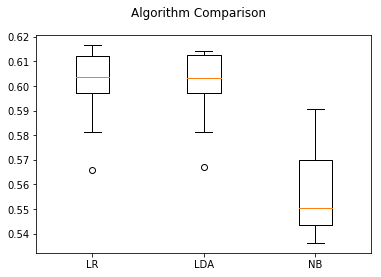

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()